In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
# from ggplot import *

In [60]:
csv = pd.read_csv('../updated.csv')
df = pd.DataFrame(csv)
df

,Unnamed: 0,date,AverageTemperatureF,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,0,1743-11-01,42.9224,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
1,5,1744-04-01,42.4184,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
2,6,1744-05-01,51.1592,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
3,7,1744-06-01,57.2918,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
4,8,1744-07-01,60.9476,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744
5,10,1744-09-01,55.0058,12.781,1.454,Århus,Denmark,57.05N,10.33E,1744
6,11,1744-10-01,46.3100,7.950,1.630,Århus,Denmark,57.05N,10.33E,1744
7,12,1744-11-01,40.3502,4.639,1.302,Århus,Denmark,57.05N,10.33E,1744
8,13,1744-12-01,32.2196,0.122,1.756,Århus,Denmark,57.05N,10.33E,1744
9,14,1745-01-01,29.6006,-1.333,1.642,Århus,Denmark,57.05N,10.33E,1745


In [5]:
year_mask = df.year > 1800
yearavg = df[year_mask].groupby(['Country', 'year'],as_index=False)['AverageTemperatureF'].mean()

#yearavg.add_columns(['Latitude]['Longitude])

export = yearavg.to_csv('yearlytempavg1800.csv')

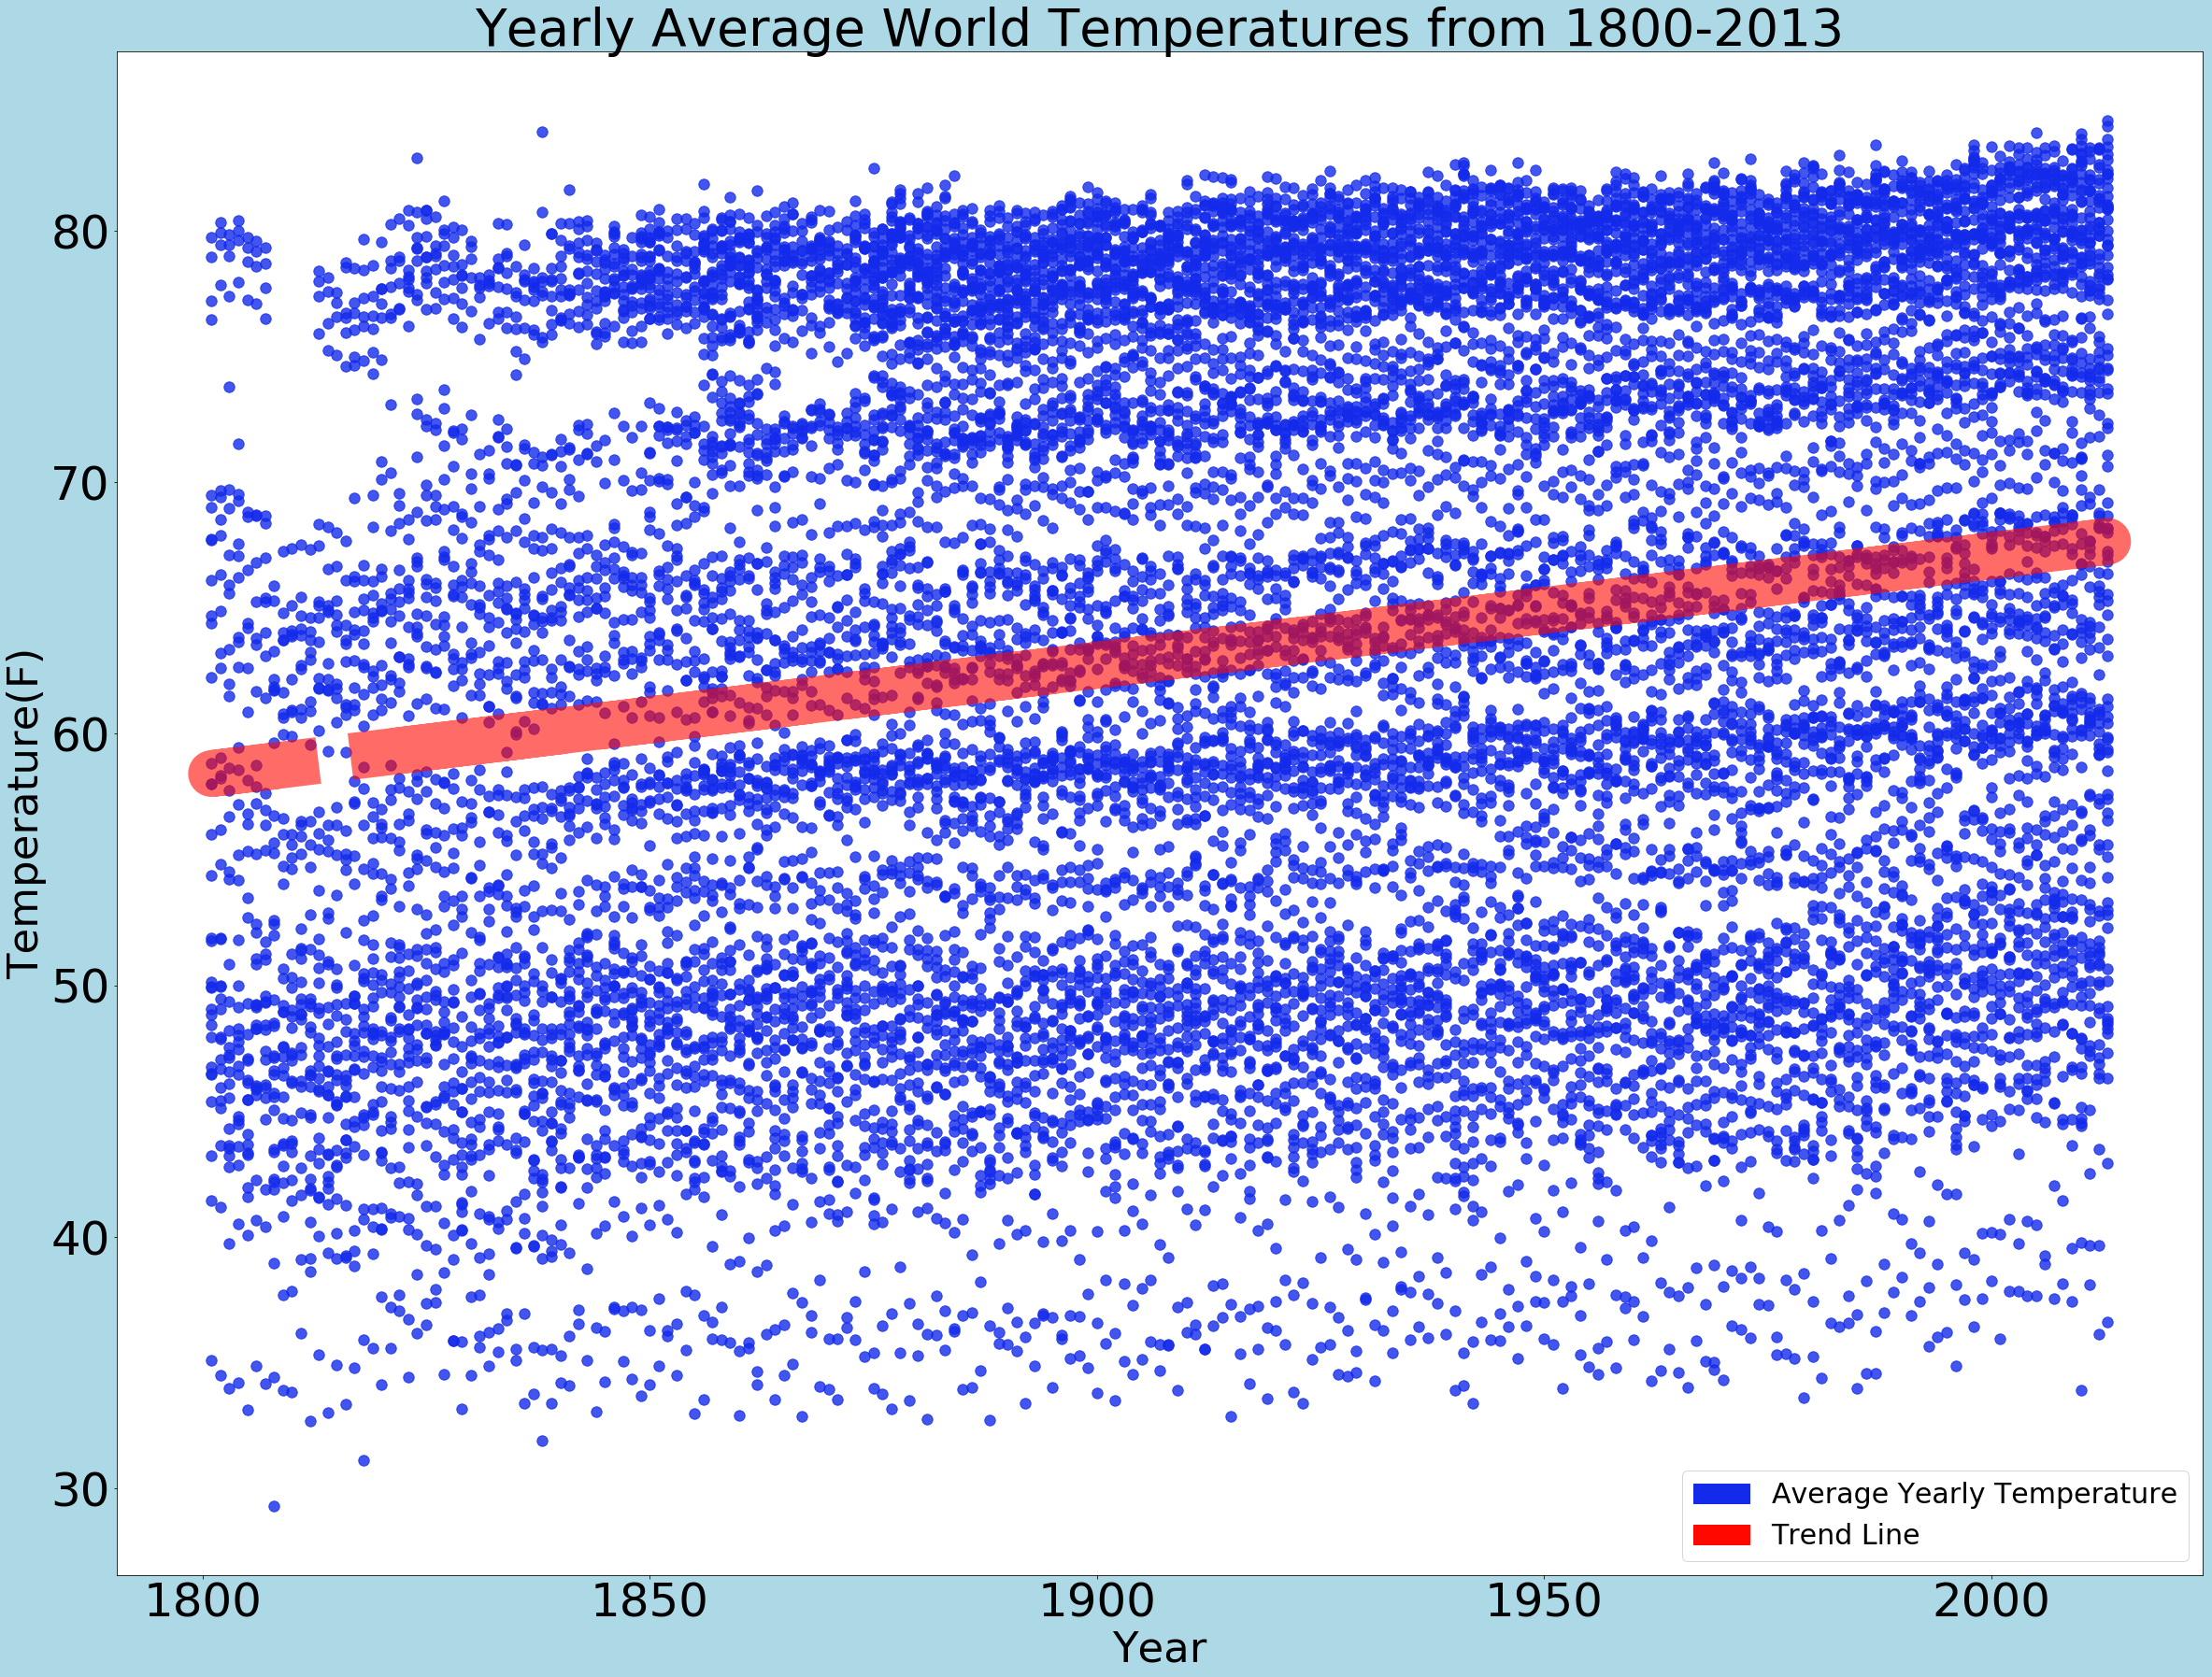

In [6]:
plt.figure(num=None, figsize=(40,30),facecolor='lightblue',edgecolor='black')

plt.xticks(size=50)

plt.xlabel('Year', size=45)

plt.ylabel('Temperature(F)', size=45)

plt.yticks(size=50)

plt.scatter(yearavg['year'], yearavg['AverageTemperatureF'], color='#132AEB', s=130, alpha=.8)

#trend_line

z = np.polyfit(yearavg['year'], yearavg['AverageTemperatureF'], 1)

p = np.poly1d(z)

plt.plot(yearavg['year'],p(yearavg['year']),"r--",color='#FF0800',linewidth=50,alpha=.6)

#legend

blue_patch = mpatches.Patch(color='#132AEB', label='Average Yearly Temperature')

red_patch = mpatches.Patch(color='#FF0800', label='Trend Line')

plt.legend(handles=[blue_patch,red_patch], prop={'size': 30})

red_patch = mpatches.Patch(color='#FF0800', label='Trend Line')

plt.title('Yearly Average World Temperatures from 1800-2013', size=55)

plt.savefig('alldata.png')

plt.show()




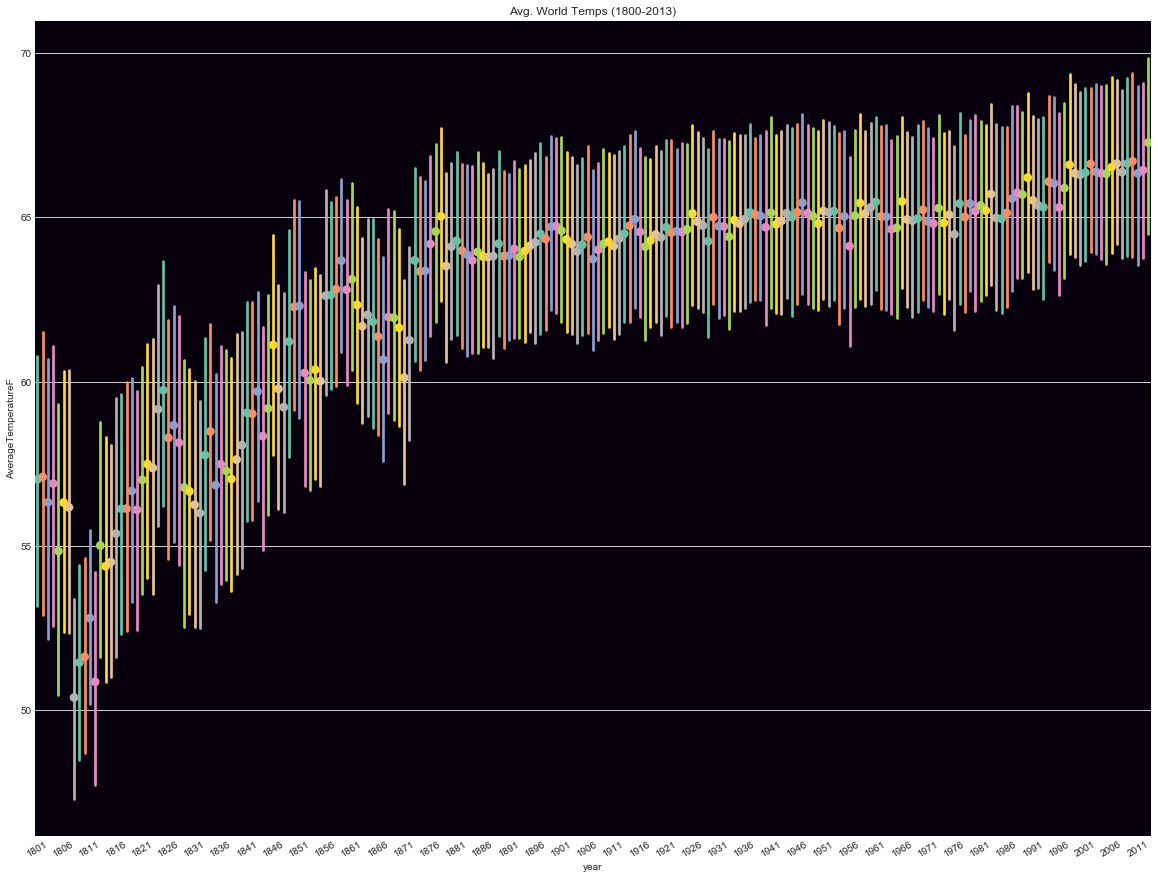

In [7]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(1)
fig.set_size_inches((20, 15))

ax = sns.pointplot(x='year', y='AverageTemperatureF',palette="Set2",data=yearavg)

ax.set_title('Avg. World Temps (1800-2013)')

ax.set_facecolor('#06010C')

sns.set(font_scale=2.3)

labels=ax.get_xticklabels()
for i,l in enumerate(labels):
    if(i%5 != 0): labels[i] = ''
ax.set_xticklabels(labels, rotation=30)

sns.set(font_scale=1.5)
plt.savefig('seabornalldata.png')

[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

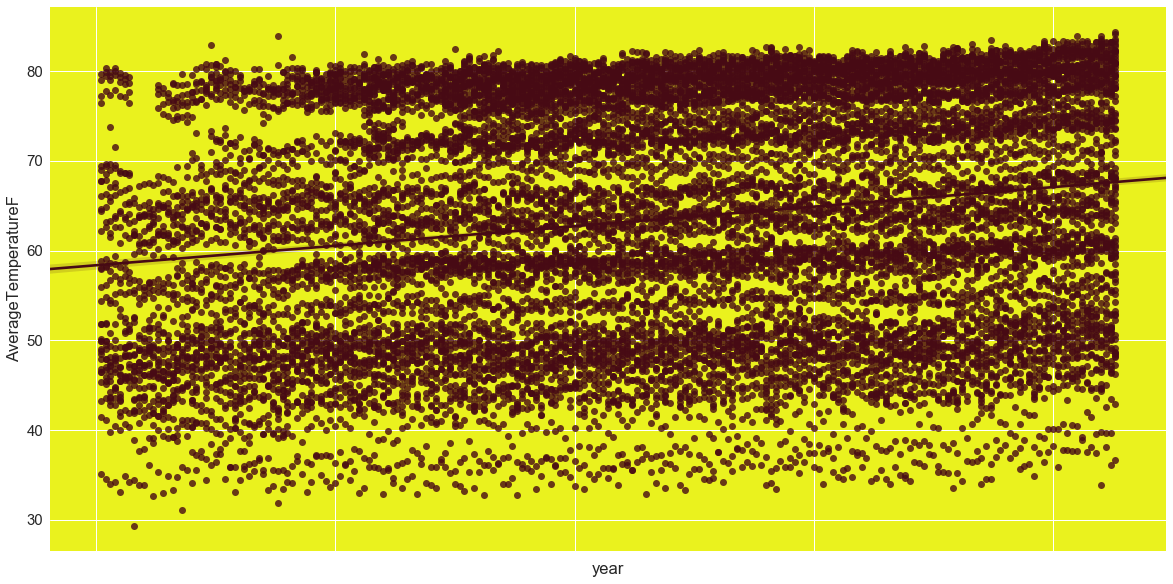

In [8]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(1)
fig.set_size_inches((20, 10))

ax = sns.regplot(x='year', y='AverageTemperatureF',data=yearavg, color='#470A14')

ax.set_facecolor('#EAF21E')

labels=ax.get_xticklabels()
for i,l in enumerate(labels):
    if(i%5 != 0): labels[i] = ''
ax.set_xticklabels(labels, rotation=30)


In [9]:
colors = sns.diverging_palette(255, 133, l=60, n=7, center="dark")

In [10]:
colors_array = yearavg['AverageTemperatureF'].apply(make_colors).values.tolist()

sns.set_style('darkgrid')

fig, ax = plt.subplots(1)
fig.set_size_inches((20, 15))

ax = sns.pointplot(x='year', y='AverageTemperatureF', data=yearavg, palette=colors)

ax.set_facecolor('#EAF21E')

ax.set_title('Avg. World Temps (1800-2013)')

sns.set(font_scale=2.3)

labels=ax.get_xticklabels()
for i,l in enumerate(labels):
    if(i%5 != 0): labels[i] = ''
ax.set_xticklabels(labels, rotation=30)

sns.set(font_scale=1.5)


NameError: name 'make_colors' is not defined

In [65]:
plt.figure(num=None, figsize=(40,30),facecolor='lightblue',edgecolor='black')

Russia = yearavg.loc[yearavg['Country']=='Russia']

Norway = yearavg.loc[yearavg['Country']=='Norway']

China = yearavg.loc[yearavg['Country']=='China']

Belgium = yearavg.loc[yearavg['Country']=='Belguim']

US = yearavg.loc[yearavg['Country']=='US']

cntry_array = [US,Russia,Kazakhstan,Norway]



In [138]:
arr = np.sort(US['AverageTemperatureF'].unique())[:10]
print (arr)

[49.17365    49.28486    49.292195   50.040815   50.28035    50.640185
 50.8427     51.048065   51.09909286 51.221465  ]


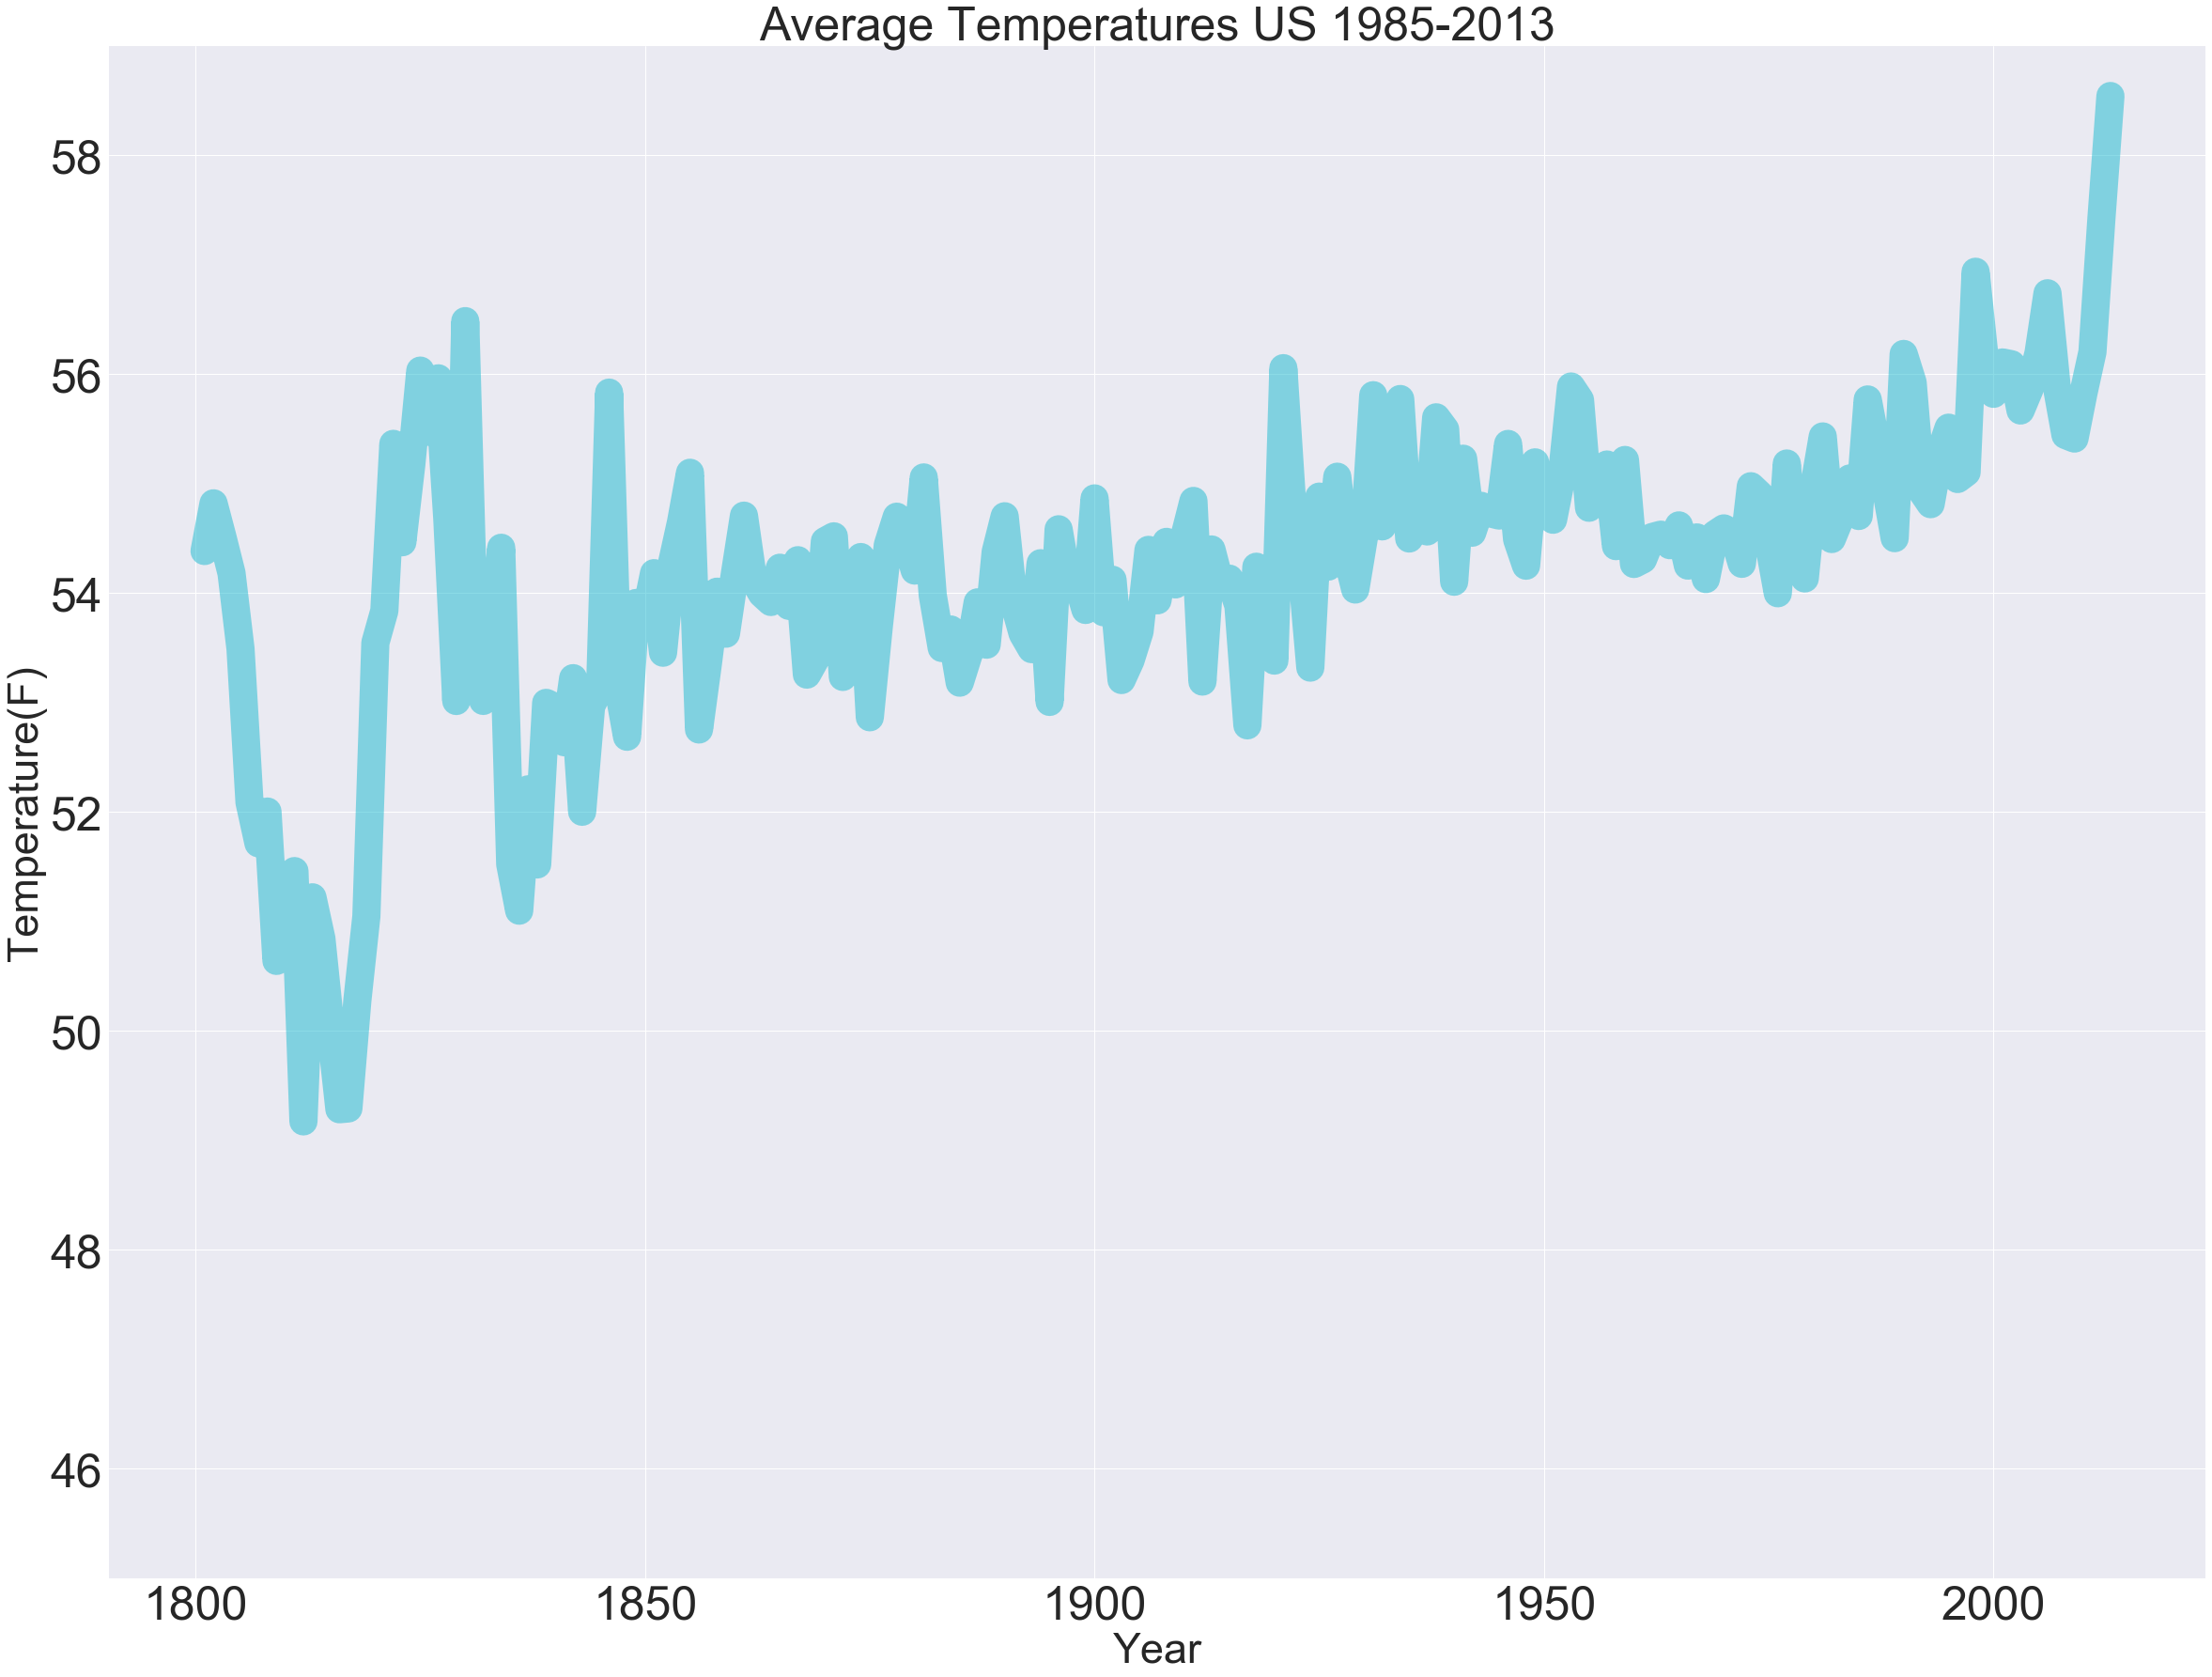

In [145]:
plt.figure(num=None, figsize=(40,30))

plt.plot(US['year'], US['AverageTemperatureF'], color='#18B9CF', linewidth=30, alpha=.5, markersize=22)

plt.ylim([45,59])

plt.xticks(size=50)

plt.title('Average Temperatures US 1985-2013', size=50)

plt.yticks(size=50)

plt.xlabel('Year', size=45)

plt.ylabel('Temperature(F)', size=45)

plt.savefig('AvgTempsUS.png')
